# **Comparing Regressors**

In this notebook we will be comparing several ML algorithms for build regression models of acetylcholinesterase inhibitors.

In [2]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

load data

In [4]:
! wget https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2023-05-30 14:28:20--  https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv [following]
--2023-05-30 14:28:20--  https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8363909 (8.0M) [text/plain]
Saving to: ‘acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_

In [5]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [6]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

data pre-processing

In [7]:
X.shape

(4695, 881)

In [8]:
#remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(4695, 137)

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [12]:
#Print complete list of classifiers
lazypredict.Supervised.CLASSIFIERS

[('AdaBoostClassifier', sklearn.ensemble._weight_boosting.AdaBoostClassifier),
 ('BaggingClassifier', sklearn.ensemble._bagging.BaggingClassifier),
 ('BernoulliNB', sklearn.naive_bayes.BernoulliNB),
 ('CalibratedClassifierCV', sklearn.calibration.CalibratedClassifierCV),
 ('CategoricalNB', sklearn.naive_bayes.CategoricalNB),
 ('DecisionTreeClassifier', sklearn.tree._classes.DecisionTreeClassifier),
 ('DummyClassifier', sklearn.dummy.DummyClassifier),
 ('ExtraTreeClassifier', sklearn.tree._classes.ExtraTreeClassifier),
 ('ExtraTreesClassifier', sklearn.ensemble._forest.ExtraTreesClassifier),
 ('GaussianNB', sklearn.naive_bayes.GaussianNB),
 ('KNeighborsClassifier',
  sklearn.neighbors._classification.KNeighborsClassifier),
 ('LabelPropagation',
  sklearn.semi_supervised._label_propagation.LabelPropagation),
 ('LabelSpreading', sklearn.semi_supervised._label_propagation.LabelSpreading),
 ('LinearDiscriminantAnalysis',
  sklearn.discriminant_analysis.LinearDiscriminantAnalysis),
 ('Linear

In [22]:
#Print complete list of regressor
lazypredict.Supervised.REGRESSORS
#lazypredict.Supervised.REGRESSORS = lazypredict.Supervised.REGRESSORS.remove[]
list1 = lazypredict.Supervised.REGRESSORS[:31]
list2 = lazypredict.Supervised.REGRESSORS[32:]
lazypredict.Supervised.REGRESSORS = list1 + list2
# removed quantileRegressor due to bug issues

### **Compare ML algorithms**

In [23]:
# defines and builds the lazyclassifier
clf = LazyRegressor(verbose=1, ignore_warnings=True, custom_metric=None)
train, test = clf.fit(X_train, X_test, Y_train, Y_test)

  2%|▏         | 1/41 [00:00<00:31,  1.27it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.1739418547087741, 'Adjusted R-Squared': 0.032656004640237324, 'RMSE': 1.4034887521970587, 'Time taken': 0.7848138809204102}


  7%|▋         | 3/41 [00:01<00:16,  2.37it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.4691617227455196, 'Adjusted R-Squared': 0.3783691584710329, 'RMSE': 1.1250834676499295, 'Time taken': 0.5076446533203125}
{'Model': 'BayesianRidge', 'R-Squared': 0.294470212864422, 'Adjusted R-Squared': 0.17379907573886122, 'RMSE': 1.297063698234381, 'Time taken': 0.17698240280151367}


 15%|█▍        | 6/41 [00:01<00:06,  5.62it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.251489831622455, 'Adjusted R-Squared': 0.12346749321081496, 'RMSE': 1.3359877616566136, 'Time taken': 0.1594562530517578}
{'Model': 'DummyRegressor', 'R-Squared': -1.6682384647026538e-06, 'Adjusted R-Squared': -0.1710381583117102, 'RMSE': 1.5442015703993608, 'Time taken': 0.04071950912475586}
{'Model': 'ElasticNet', 'R-Squared': -1.6682384647026538e-06, 'Adjusted R-Squared': -0.1710381583117102, 'RMSE': 1.5442015703993608, 'Time taken': 0.058570146560668945}


 20%|█▉        | 8/41 [00:05<00:30,  1.10it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.29916236229453597, 'Adjusted R-Squared': 0.1792937525995939, 'RMSE': 1.2927434204755432, 'Time taken': 3.9019088745117188}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.26119632073898447, 'Adjusted R-Squared': 0.13483414338722532, 'RMSE': 1.3272971207975897, 'Time taken': 0.17096924781799316}


 24%|██▍       | 10/41 [00:13<01:00,  1.97s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.28825491721648444, 'Adjusted R-Squared': 0.16652073951193813, 'RMSE': 1.3027643488207168, 'Time taken': 7.124285459518433}
{'Model': 'GammaRegressor', 'R-Squared': 0.20112477140920393, 'Adjusted R-Squared': 0.06448818424698288, 'RMSE': 1.3802034382205506, 'Time taken': 0.18828439712524414}


 27%|██▋       | 11/41 [00:18<01:27,  2.92s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -5.222195327563195, 'Adjusted R-Squared': -6.286416001565889, 'RMSE': 3.8519039374054964, 'Time taken': 5.20766282081604}


 29%|██▉       | 12/41 [00:20<01:19,  2.74s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.39425027611673613, 'Adjusted R-Squared': 0.2906451423189744, 'RMSE': 1.2018499229270154, 'Time taken': 2.3004510402679443}


 32%|███▏      | 13/41 [00:23<01:13,  2.64s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.5273939213686236, 'Adjusted R-Squared': 0.4465611713405355, 'RMSE': 1.0615813474283171, 'Time taken': 2.410505533218384}


 37%|███▋      | 15/41 [00:23<00:37,  1.44s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.3090726745670985, 'Adjusted R-Squared': 0.19089908707108416, 'RMSE': 1.2835707504215565, 'Time taken': 0.5018861293792725}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.4664434418397142, 'Adjusted R-Squared': 0.3751859531156704, 'RMSE': 1.1279604151644955, 'Time taken': 0.12154984474182129}


 41%|████▏     | 17/41 [00:25<00:24,  1.04s/it]

{'Model': 'KernelRidge', 'R-Squared': -13.761931002868062, 'Adjusted R-Squared': -16.286755656292435, 'RMSE': 5.933011813488305, 'Time taken': 1.3906474113464355}
{'Model': 'Lars', 'R-Squared': -0.9226513339333768, 'Adjusted R-Squared': -1.251494321135465, 'RMSE': 2.1411835309867358, 'Time taken': 0.11446022987365723}


 44%|████▍     | 18/41 [00:25<00:20,  1.15it/s]

{'Model': 'LarsCV', 'R-Squared': 0.10657674412788642, 'Adjusted R-Squared': -0.04623097878657001, 'RMSE': 1.4595946204107233, 'Time taken': 0.46729111671447754}
{'Model': 'Lasso', 'R-Squared': -1.6682384647026538e-06, 'Adjusted R-Squared': -0.1710381583117102, 'RMSE': 1.5442015703993608, 'Time taken': 0.06459879875183105}


 51%|█████     | 21/41 [00:29<00:21,  1.08s/it]

{'Model': 'LassoCV', 'R-Squared': 0.2995040186086704, 'Adjusted R-Squared': 0.17969384451302473, 'RMSE': 1.2924282777304814, 'Time taken': 3.9204483032226562}
{'Model': 'LassoLars', 'R-Squared': -1.6682384647026538e-06, 'Adjusted R-Squared': -0.1710381583117102, 'RMSE': 1.5442015703993608, 'Time taken': 0.11598730087280273}


 54%|█████▎    | 22/41 [00:30<00:17,  1.10it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.298000855294255, 'Adjusted R-Squared': 0.17793358585020125, 'RMSE': 1.2938142169342042, 'Time taken': 0.43932604789733887}


 59%|█████▊    | 24/41 [00:30<00:09,  1.77it/s]

{'Model': 'LassoLarsIC', 'R-Squared': 0.2980645462551288, 'Adjusted R-Squared': 0.17800817027129945, 'RMSE': 1.2937555230308937, 'Time taken': 0.2037336826324463}
{'Model': 'LinearRegression', 'R-Squared': 0.23060937525896175, 'Adjusted R-Squared': 0.09901572283758564, 'RMSE': 1.3544939592817744, 'Time taken': 0.16232061386108398}


 61%|██████    | 25/41 [00:31<00:11,  1.42it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.307458809329049, 'Adjusted R-Squared': 0.18900919244775027, 'RMSE': 1.285068955726866, 'Time taken': 1.0437517166137695}


 63%|██████▎   | 26/41 [00:41<00:52,  3.47s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.4683022155277071, 'Adjusted R-Squared': 0.37736264440073575, 'RMSE': 1.1259939391460048, 'Time taken': 10.258100032806396}


 66%|██████▌   | 27/41 [00:43<00:41,  2.98s/it]

{'Model': 'NuSVR', 'R-Squared': 0.4753460587670668, 'Adjusted R-Squared': 0.3856112398545677, 'RMSE': 1.118510582343847, 'Time taken': 1.7781143188476562}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.20591458550361397, 'Adjusted R-Squared': 0.07009722996553047, 'RMSE': 1.3760595764956092, 'Time taken': 0.06522893905639648}


 73%|███████▎  | 30/41 [00:44<00:14,  1.29s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.20591458550361397, 'Adjusted R-Squared': 0.07009722996553047, 'RMSE': 1.3760595764956092, 'Time taken': 0.14115023612976074}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.4084316896012927, 'Adjusted R-Squared': -0.6493245004319756, 'RMSE': 1.8326162010383713, 'Time taken': 0.1001889705657959}


 76%|███████▌  | 31/41 [00:44<00:10,  1.05s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.2612413682477356, 'Adjusted R-Squared': 0.1348868956509064, 'RMSE': 1.3272566551490046, 'Time taken': 0.35288381576538086}


 78%|███████▊  | 32/41 [00:46<00:13,  1.45s/it]

{'Model': 'RANSACRegressor', 'R-Squared': -7.889647178492747e+21, 'Adjusted R-Squared': -9.239062488671906e+21, 'RMSE': 137161560860.56796, 'Time taken': 2.5335142612457275}


 80%|████████  | 33/41 [00:51<00:19,  2.45s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.5019274242846499, 'Adjusted R-Squared': 0.416738981247193, 'RMSE': 1.0898078765243955, 'Time taken': 5.035491466522217}
{'Model': 'Ridge', 'R-Squared': 0.2993403693328667, 'Adjusted R-Squared': 0.17950220528617844, 'RMSE': 1.2925792369121456, 'Time taken': 0.05368542671203613}


 88%|████████▊ | 36/41 [00:52<00:05,  1.13s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.29976804138462476, 'Adjusted R-Squared': 0.18000302474254437, 'RMSE': 1.2921846912789599, 'Time taken': 0.20356202125549316}
{'Model': 'SGDRegressor', 'R-Squared': 0.2929102741251456, 'Adjusted R-Squared': 0.1719723309979857, 'RMSE': 1.298496821804606, 'Time taken': 0.19011569023132324}


 90%|█████████ | 37/41 [00:54<00:05,  1.38s/it]

{'Model': 'SVR', 'R-Squared': 0.48219562318632814, 'Adjusted R-Squared': 0.39363232777624946, 'RMSE': 1.1111852964622337, 'Time taken': 2.1350531578063965}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.23060937525896175, 'Adjusted R-Squared': 0.09901572283758564, 'RMSE': 1.3544939592817744, 'Time taken': 0.08918905258178711}


 95%|█████████▌| 39/41 [00:54<00:01,  1.14it/s]

{'Model': 'TweedieRegressor', 'R-Squared': 0.2029777362947366, 'Adjusted R-Squared': 0.06665807321406114, 'RMSE': 1.3786018406695317, 'Time taken': 0.26198267936706543}


 98%|█████████▊| 40/41 [00:57<00:01,  1.25s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.51999923178906, 'Adjusted R-Squared': 0.4379017221200229, 'RMSE': 1.0698541945562696, 'Time taken': 2.471522569656372}


100%|██████████| 41/41 [00:57<00:00,  1.41s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.517795955895236, 'Adjusted R-Squared': 0.43532160627931504, 'RMSE': 1.07230677937029, 'Time taken': 0.49147891998291016}


In [24]:
#Performance table of the training set(80)
train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.45,0.53,1.06,2.41
XGBRegressor,0.44,0.52,1.07,2.47
LGBMRegressor,0.44,0.52,1.07,0.49
RandomForestRegressor,0.42,0.50,1.09,5.04
SVR,0.39,0.48,1.11,2.14
NuSVR,0.39,0.48,1.12,1.78
BaggingRegressor,0.38,0.47,1.13,0.51
MLPRegressor,0.38,0.47,1.13,10.26
KNeighborsRegressor,0.38,0.47,1.13,0.12


In [25]:
#Performance table of the test set(20)
test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.45,0.53,1.06,2.41
XGBRegressor,0.44,0.52,1.07,2.47
LGBMRegressor,0.44,0.52,1.07,0.49
RandomForestRegressor,0.42,0.50,1.09,5.04
SVR,0.39,0.48,1.11,2.14
NuSVR,0.39,0.48,1.12,1.78
BaggingRegressor,0.38,0.47,1.13,0.51
MLPRegressor,0.38,0.47,1.13,10.26
KNeighborsRegressor,0.38,0.47,1.13,0.12


**Data visualization of model performance**

[(0.0, 1.0)]

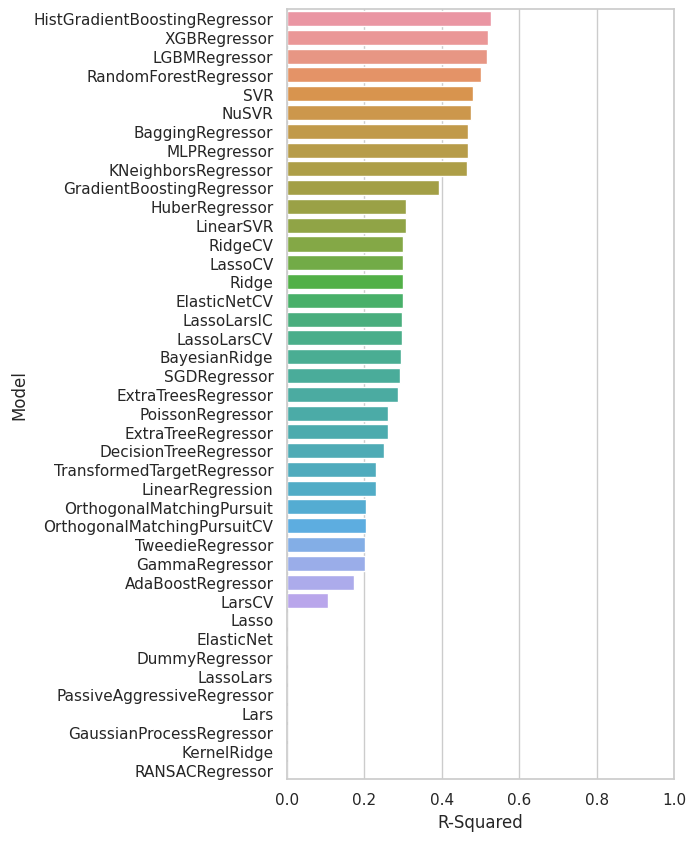

In [27]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="R-Squared", data=train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

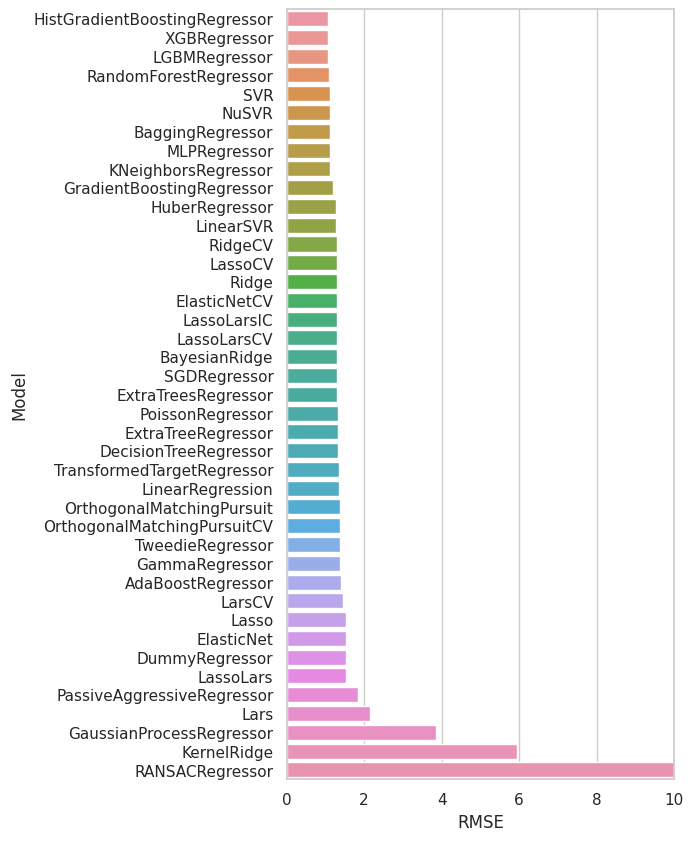

In [28]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="RMSE", data=train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

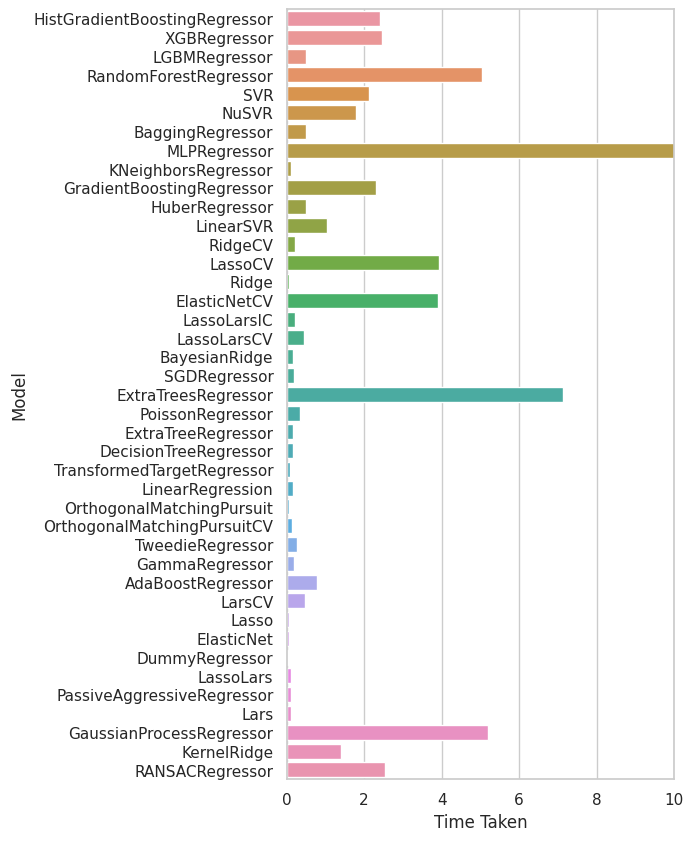

In [29]:
#Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax=sns.barplot(y=train.index, x="Time Taken", data=train)
ax.set(xlim=(0, 10))